# Spherical mesh of Australia

Download a GeoTiff from Geoscience Australia's online API.

In [95]:
import numpy as np
import quagmire
from quagmire import function as fn
from quagmire import tools as meshtools
%matplotlib inline

import h5py
import netCDF4

In [96]:
extent_australia = [112, 155, -44, -10]
lonmin, lonmax, latmin, latmax = extent_australia

data_dir = "./data/"
etopo_filename = data_dir+'ETOPO1_Ice_g_geotiff.tif'

In [129]:
ds = gdal.Open(etopo_filename)
band = ds.GetRasterBand(1)
height = band.ReadAsArray()
height = np.flipud(height)
[cols, rows] = height.shape

left, hres, n0, top, n1, vres  = ds.GetGeoTransform()
right = left+rows*hres
bottom = top+cols*vres

loncoords = np.arange(left, right, hres)
latcoords = np.arange(top,  bottom, vres)
latcoords = latcoords[::-1]
xq,yq = np.meshgrid(loncoords, latcoords)



In [134]:
overlap = 10

i0 = np.abs(loncoords - lonmin).argmin() - overlap
i1 = np.abs(loncoords - lonmax).argmin() + overlap
j0 = np.abs(latcoords - latmin).argmin() - overlap
j1 = np.abs(latcoords - latmax).argmin() + overlap

height_trimmed = height[j0:j1,i0:i1]

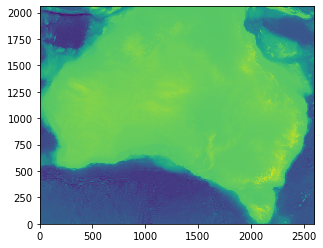

In [140]:
plt.imshow(height_trimmed, origin='lower')

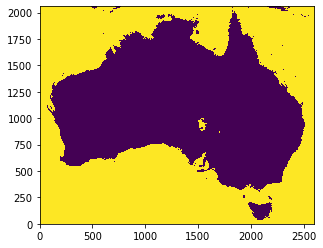

In [141]:
plt.imshow((height_trimmed < 0).astype(np.int), origin='lower')

In [139]:
# save as hdf5

with h5py.File(data_dir+'ETOPO1_Ice_g.h5', 'w') as h5:
    h5_data = h5.create_dataset('data', height_trimmed.shape, height_trimmed.dtype, height_trimmed)
    h5_lons = h5.create_dataset('lons', (height_trimmed.shape[1],), loncoords.dtype)
    h5_lats = h5.create_dataset('lats', (height_trimmed.shape[0],), latcoords.dtype)
    h5_lons[:] = loncoords[i0:i1]
    h5_lats[:] = latcoords[j0:j1]
    